In [2]:
# imports
import sys
sys.path.append( '..' )

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

from significance_analysis import *

sns.set_theme(rc={"figure.figsize":(12, 6)})

In [17]:
# Load matrices
strains = pd.read_csv("/mnt/d/data/Com8_grown_together/strains.tsv", sep="\t")
comm8 = pd.read_csv("/mnt/d/data/Com8_grown_together/comb_one_hot.tsv", sep="\t")
metData = pd.read_csv("/mnt/d/data/Com8_grown_together/metData.tsv", sep="\t")
metData.index = pd.read_csv("/mnt/d/data/Com8_grown_together/metName.tsv", sep="\t")

met_raw_pos = join_df_metNames( pd.read_excel("/mnt/d/data/Com8_grown_together/FIA-Data Com8_20230717_P0024_msAV206-312.xlsx", sheet_name="pos"), include_mass=True)
met_raw_neg = join_df_metNames( pd.read_excel("/mnt/d/data/Com8_grown_together/FIA-Data Com8_20230717_P0024_msAV206-312.xlsx", sheet_name="neg"), include_mass=True)
met_raw_comb = pd.concat( [ met_raw_pos, met_raw_neg ] )
met_comb = pd.concat( [ total_ion_count_normalization(met_raw_pos), total_ion_count_normalization(met_raw_neg) ] ).loc[:, ["MS" in col for col in met_raw_comb.columns]]

X = met_comb.transpose()

In [18]:
results = test_metabolites_organism(data=X, community_composition=comm8, organism_idx=0, alpha=1e-21, test=f_oneway)

## Plotting

In [19]:
figures, test_stats, includes = plot_volcanos(X, strains, comm8, met_raw_comb["ref_mass"], sig_p=0.05, sig_fc_pos=4, sig_fc_neg=0.25,
                                              color_map={}, show_labels=False, outfolder="../../reports/FIA/metabalysis")

In [20]:
figures.keys()

dict_keys(['C. ramosum', 'R. gnavus', 'C. aerofaciens', 'B. thetaiotaomicron', 'B. uniformis', 'B. vulgatus', 'F. nucleatum', 'R. intestinalis '])

In [30]:
figures.get('R. gnavus')

In [31]:
ts = test_stats.get("R. gnavus")
ts.T.loc[ts.T["position"] == "significant + high positive fold-change"]

MS1       MS2  \
metNames                                                                 
Phenylethylamine[M+H]+\n1-Phenylethylamine[M+H]     0.000155   0.00383   
(1R,2S,3R,4S,5S)-2,3-epoxy-5-methylcyclohexane-...  0.000063  0.000695   
Tryptamine[M+H]                                     0.000073  0.003729   
3-Hydroxyoctanoic acid[M+H]+\nEthyl 3-hydroxy h...   0.00004  0.000444   
Menaquinol 8[M+H]                                    0.00009  0.000859   
PA(i-19:0/i-19:0)[M-H]                              0.000076  0.000429   

                                                         MS3       MS4  \
metNames                                                                 
Phenylethylamine[M+H]+\n1-Phenylethylamine[M+H]     0.000218  0.000185   
(1R,2S,3R,4S,5S)-2,3-epoxy-5-methylcyclohexane-...   0.00007   0.00008   
Tryptamine[M+H]                                      0.00008   0.00008   
3-Hydroxyoctanoic acid[M+H]+\nEthyl 3-hydroxy h...  0.000051  0.000036   
Menaquinol 8[M+H]                                   0.000094  0.000069   
PA(i-19:0/i-19:0)[M-H]                              0.000031   0.00004   

                                                         MS5       MS6  \
metNames                                                                 
Phenylethylamine[M+H]+\n1-Phenylethylamine[M+H]     0.000168  0.000148   
(1R,2S,3R,4S,5S)-2,3-epoxy-5-methylcyclohexane-...  0.000071  0.000059   
Tryptamine[M+H]                                     0.000106  0.000084   
3-Hydroxyoctanoic acid[M+H]+\nEthyl 3-hydroxy h...  0.000031  0.000031   
Menaquinol 8[M+H]                                   0.000086  0.000098   
PA(i-19:0/i-19:0)[M-H]                              0.000053   0.00004   

                                                         MS7       MS8  \
metNames                                                                 
Phenylethylamine[M+H]+\n1-Phenylethylamine[M+H]     0.000174  0.000146   
(1R,2S,3R,4S,5S)-2,3-epoxy-5-methylcyclohexane-...  0.000058  0.000062   
Tryptamine[M+H]                                     0.000074  0.000077   
3-Hydroxyoctanoic acid[M+H]+\nEthyl 3-hydroxy h...   0.00004  0.000036   
Menaquinol 8[M+H]                                    0.00006   0.00007   
PA(i-19:0/i-19:0)[M-H]                              0.000039   0.00003   

                                                         MS9      MS10  ...  \
metNames                                                                ...   
Phenylethylamine[M+H]+\n1-Phenylethylamine[M+H]      0.00105   0.00103  ...   
(1R,2S,3R,4S,5S)-2,3-epoxy-5-methylcyclohexane-...  0.000252  0.000244  ...   
Tryptamine[M+H]                                     0.001037  0.001006  ...   
3-Hydroxyoctanoic acid[M+H]+\nEthyl 3-hydroxy h...  0.000137  0.000151  ...   
Menaquinol 8[M+H]                                   0.000316  0.000264  ...   
PA(i-19:0/i-19:0)[M-H]                              0.000208  0.000156  ...   

                                                        MS66      MS67  \
metNames                                                                 
Phenylethylamine[M+H]+\n1-Phenylethylamine[M+H]     0.000752  0.000787   
(1R,2S,3R,4S,5S)-2,3-epoxy-5-methylcyclohexane-...  0.000101  0.000156   
Tryptamine[M+H]                                     0.000355  0.000672   
3-Hydroxyoctanoic acid[M+H]+\nEthyl 3-hydroxy h...  0.000071  0.000094   
Menaquinol 8[M+H]                                    0.00008  0.000166   
PA(i-19:0/i-19:0)[M-H]                              0.000059  0.000109   

                                                        MS68    sig    p  \
metNames                                                                   
Phenylethylamine[M+H]+\n1-Phenylethylamine[M+H]     0.000167  False  0.0   
(1R,2S,3R,4S,5S)-2,3-epoxy-5-methylcyclohexane-...  0.000076  False  0.0   
Tryptamine[M+H]                                     0.000064  False  0.0   
3-Hydroxyoctanoic acid[M+H]+\nEthyl 3-hydroxy h...  0.000033  False  0.0   
Men

## Inspection

In [26]:
metabs_of_interest, p_vals = extract_metabolites_of_interest(test_stats)

100%|██████████| 8/8 [00:00<00:00, 23.36it/s]


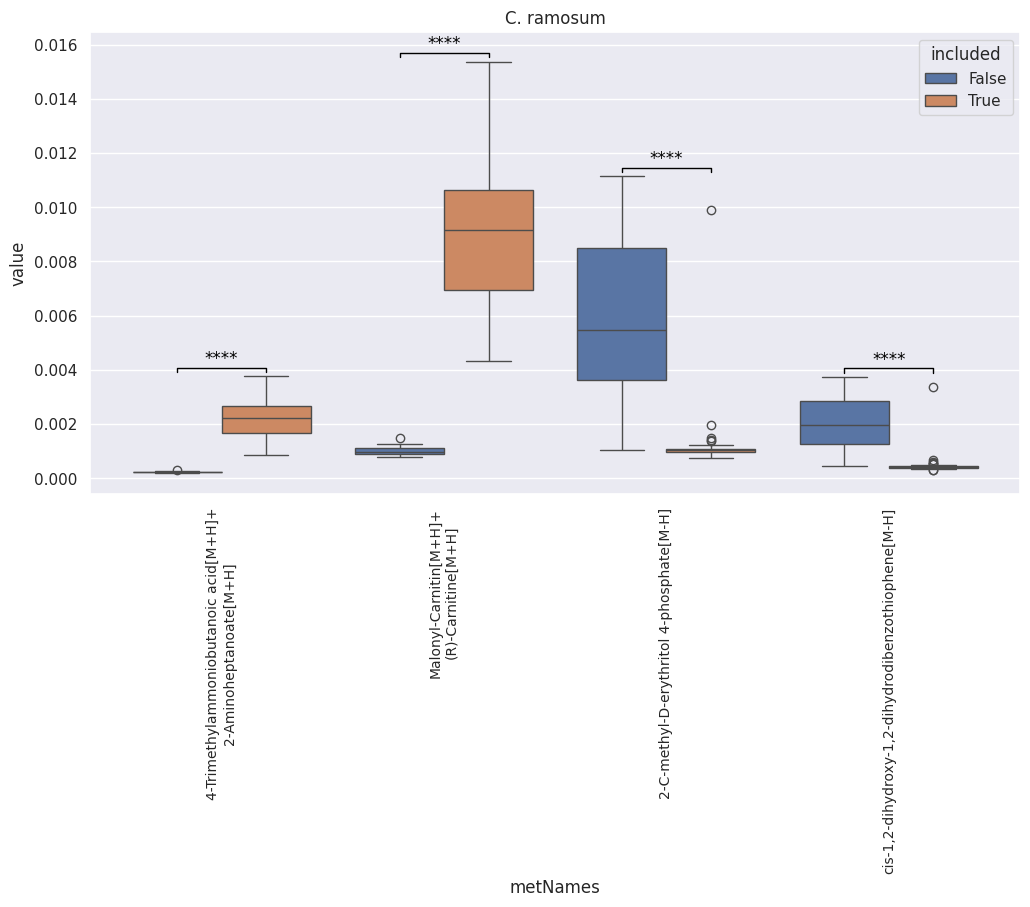

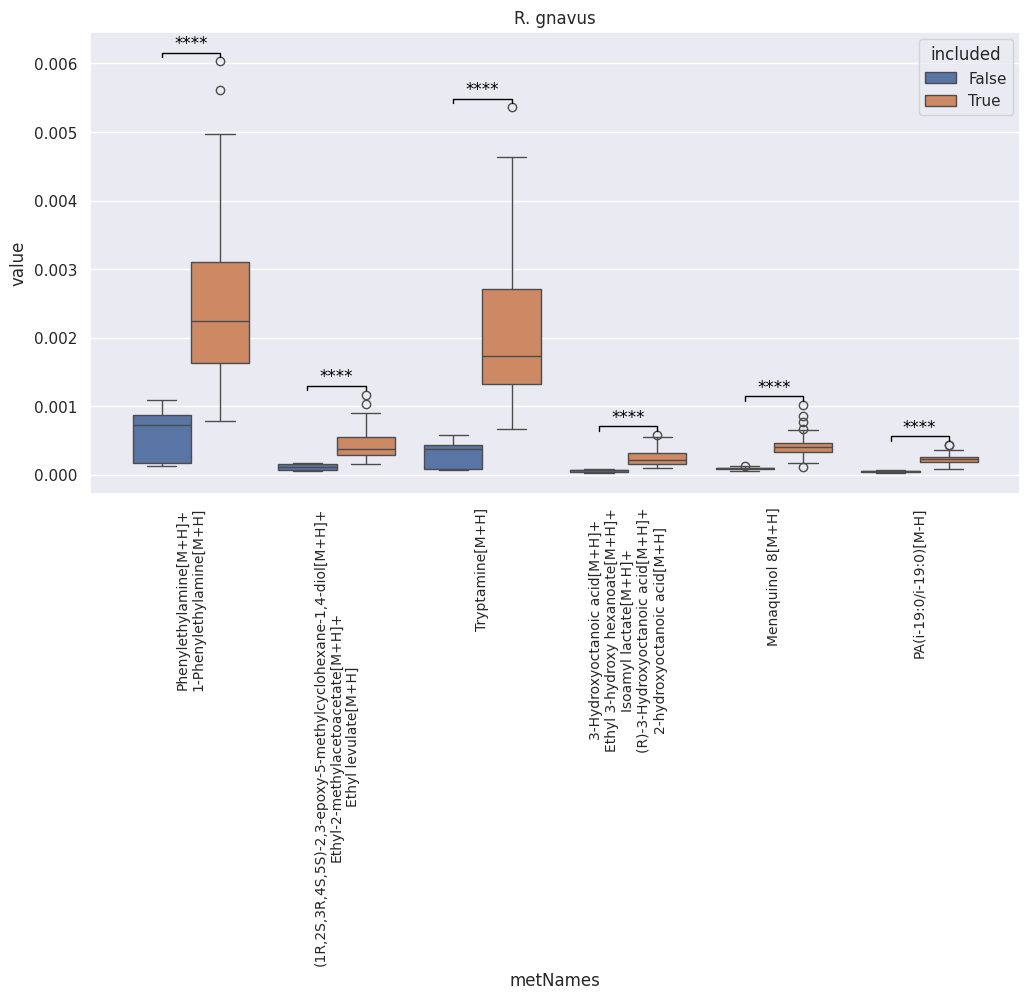

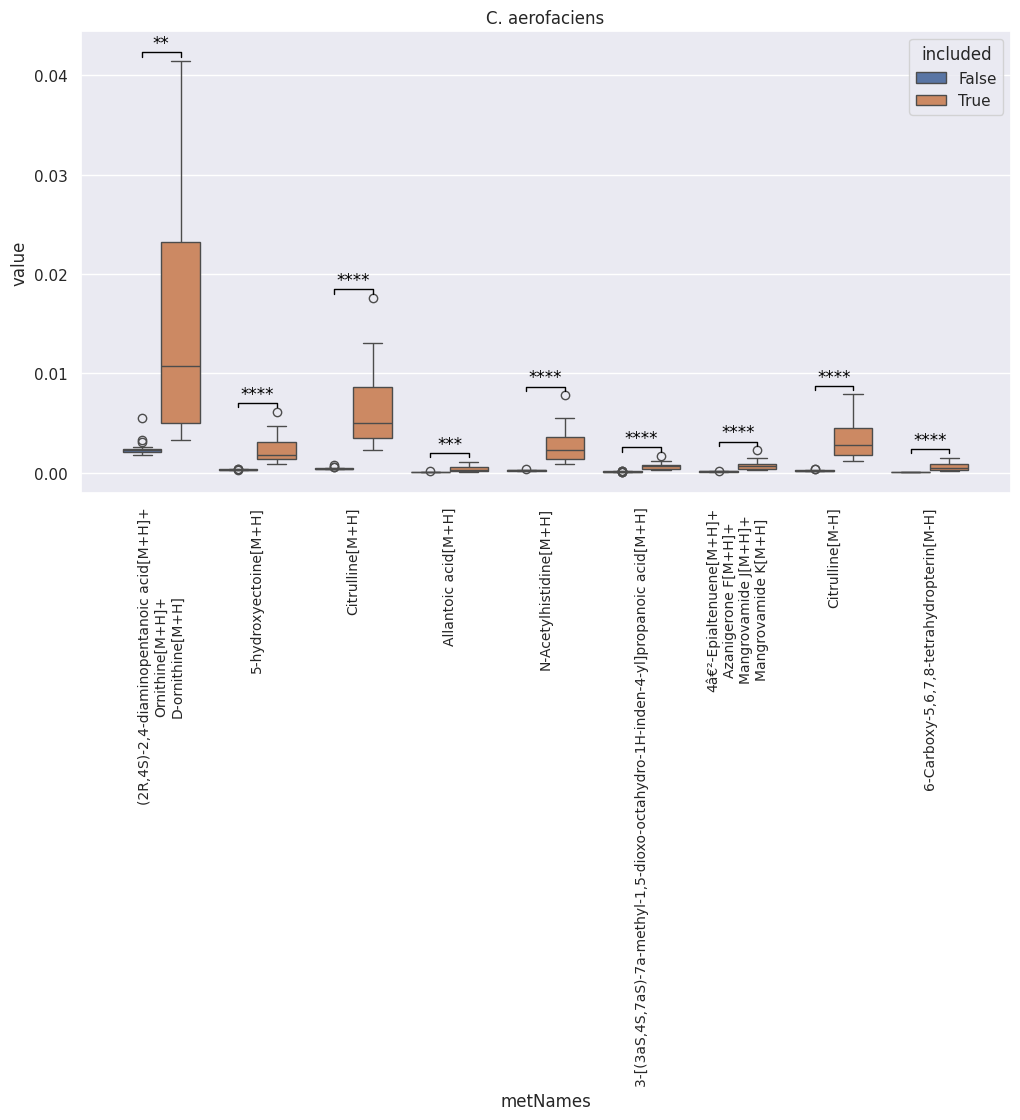

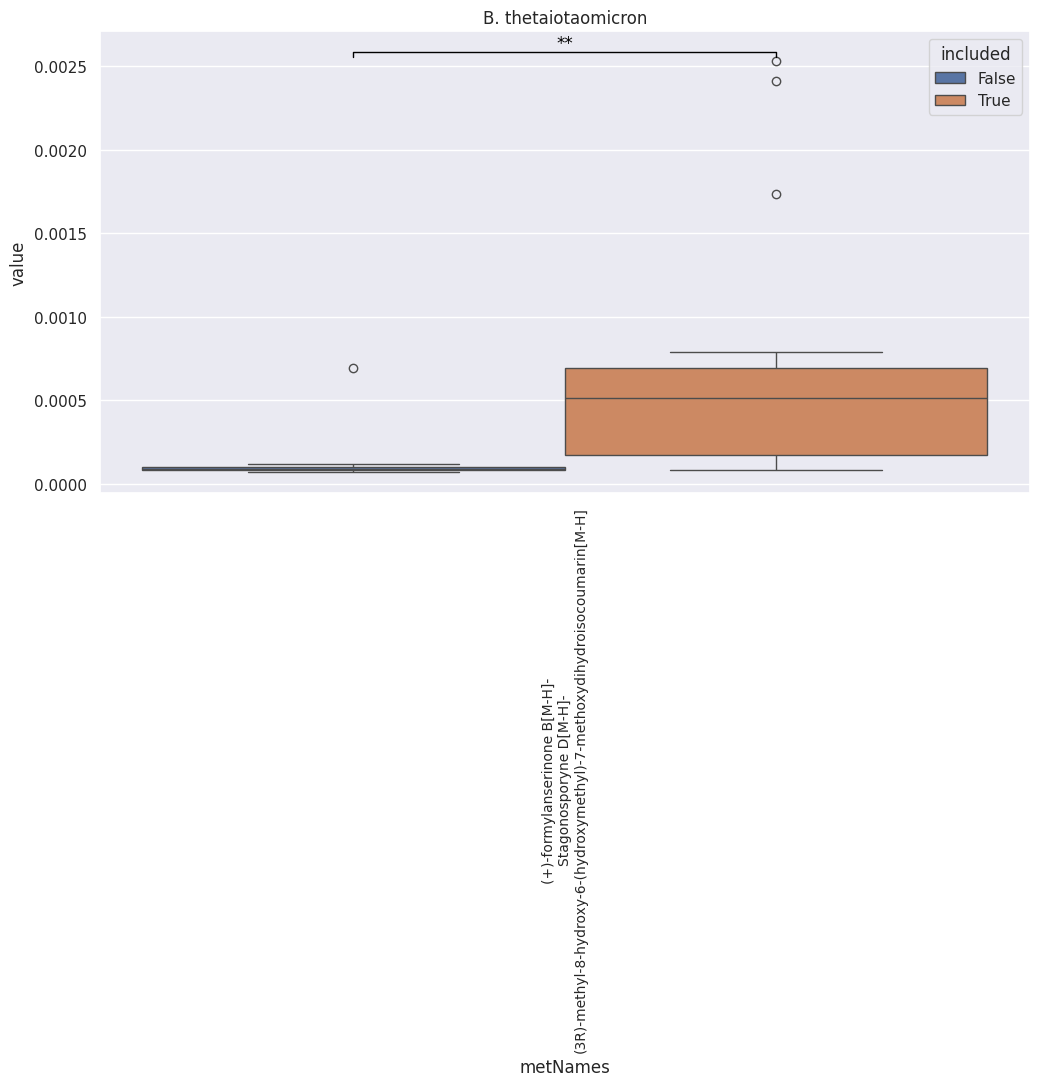

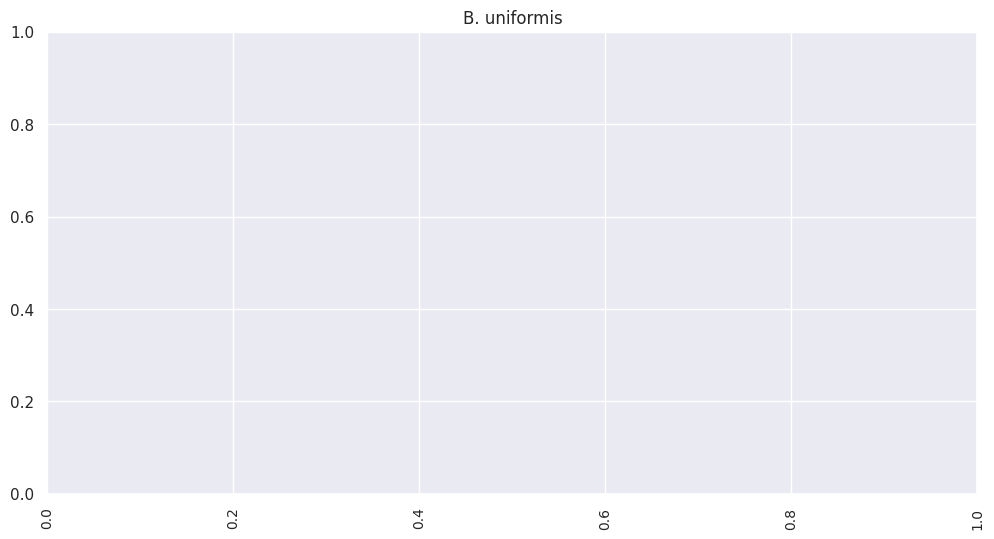

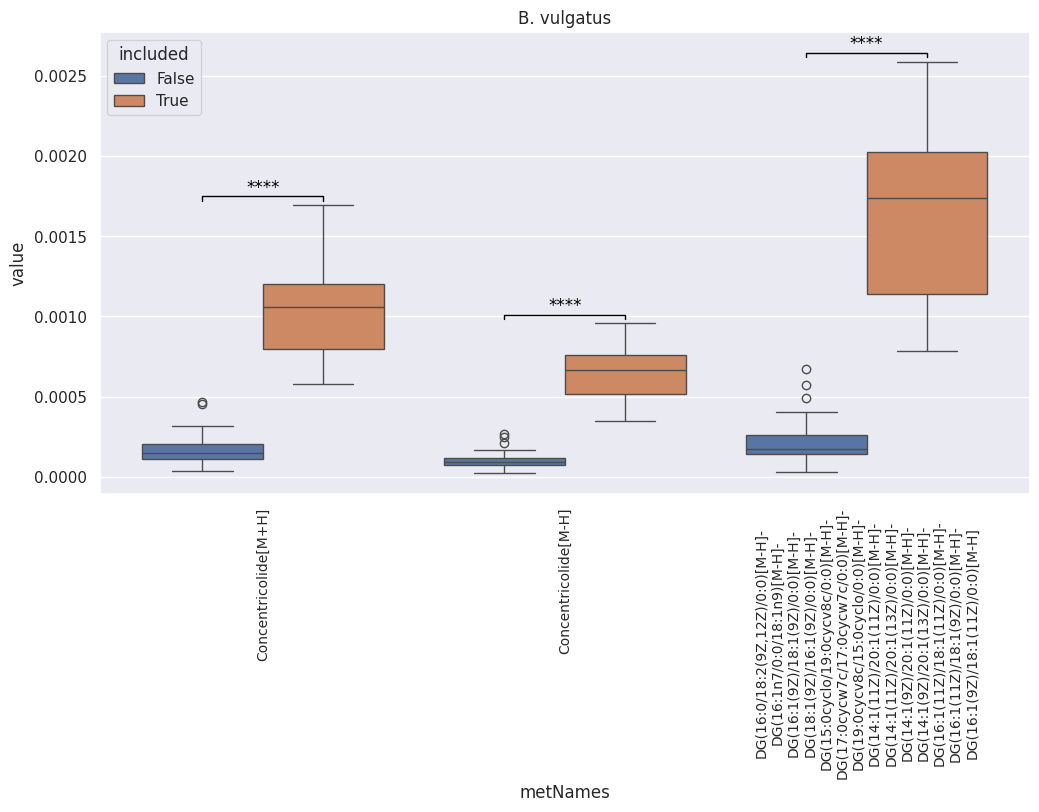

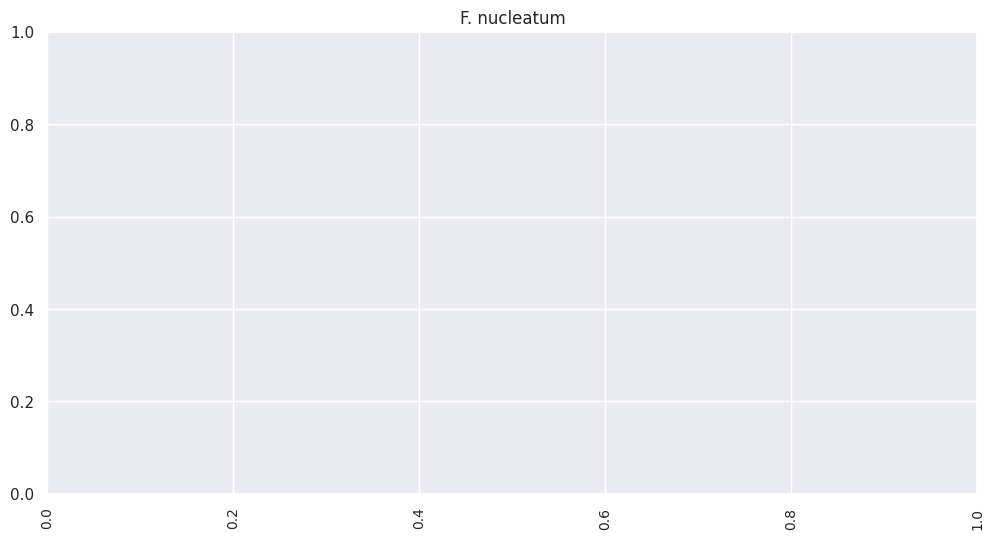

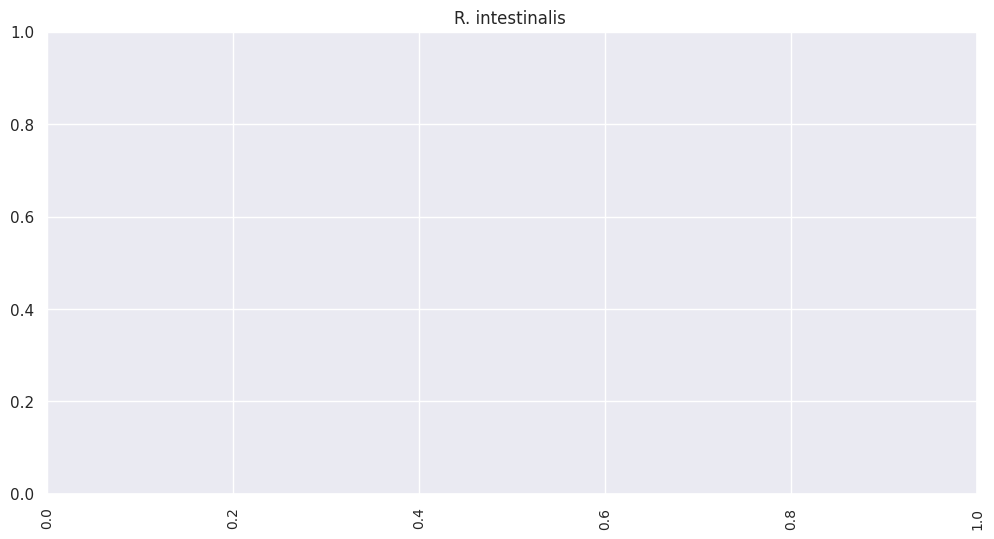

In [7]:
plots, axs = significance_plot_batch(metabs_of_interest, includes, p_vals)

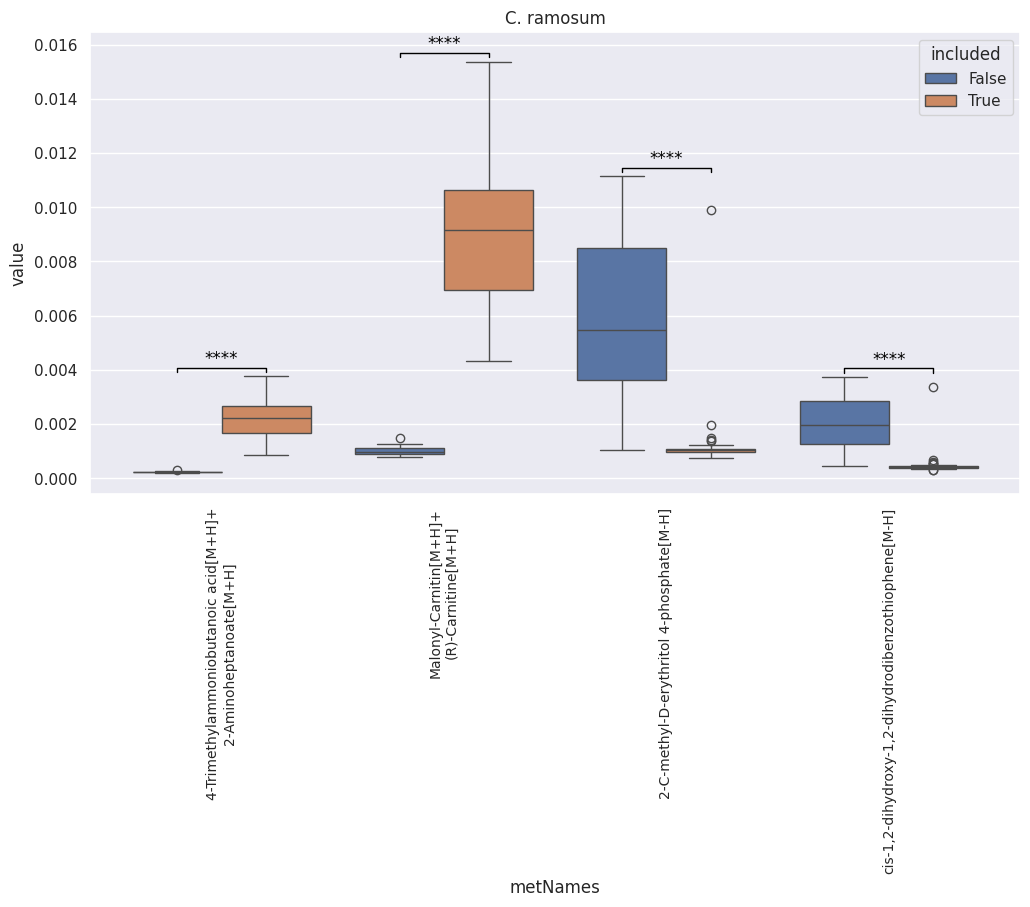

In [8]:
plots.get("C. ramosum")

## Comparison to classification

In [9]:
importances_df = pd.read_csv("../../reports/ML/XGBoost/feature_importance_2.tsv", sep="\t")

100%|██████████| 8/8 [00:00<00:00, 16.47it/s]


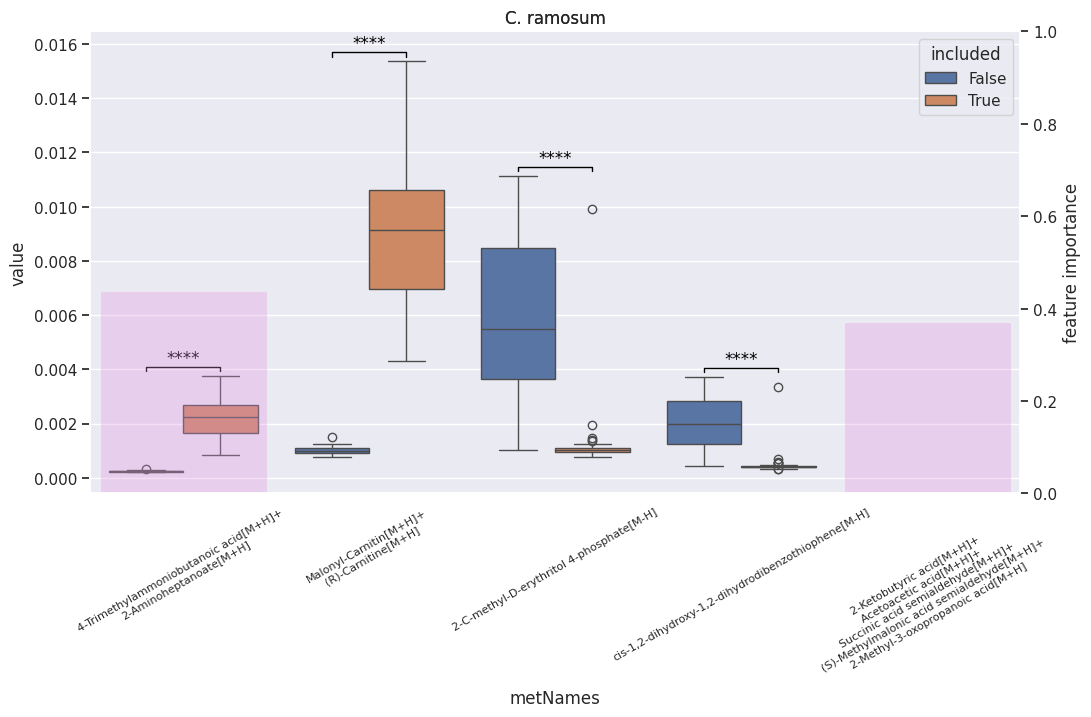

<Figure size 1200x600 with 0 Axes>

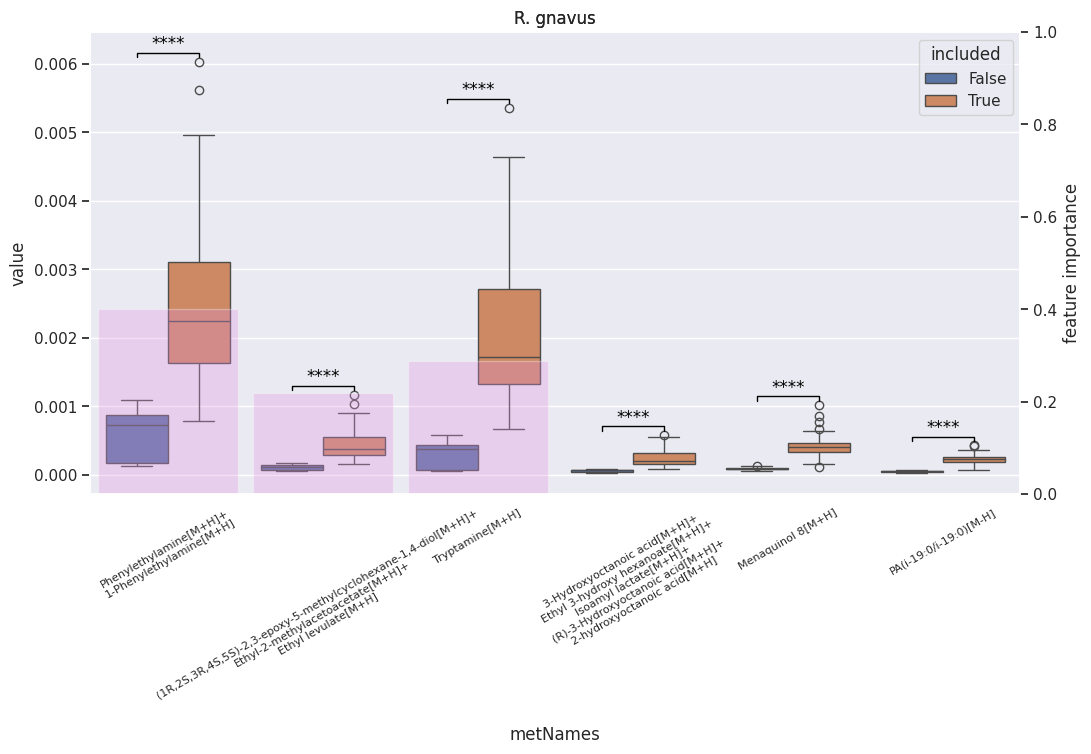

<Figure size 1200x600 with 0 Axes>

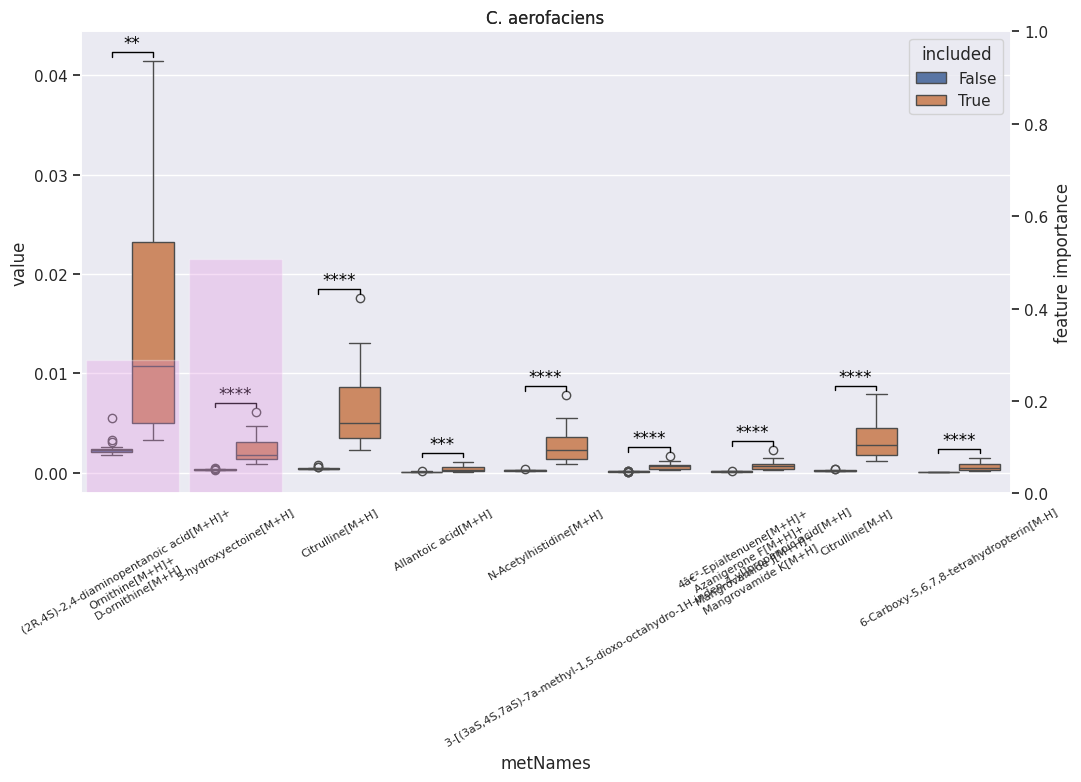

<Figure size 1200x600 with 0 Axes>

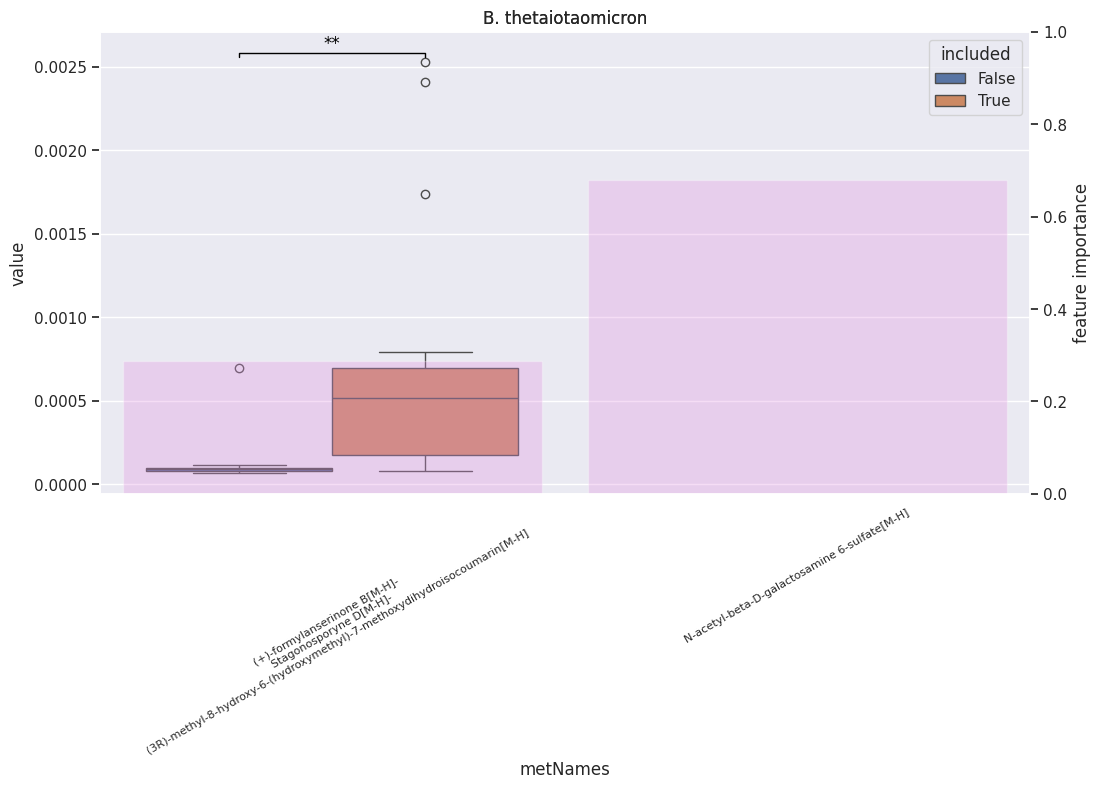

<Figure size 1200x600 with 0 Axes>

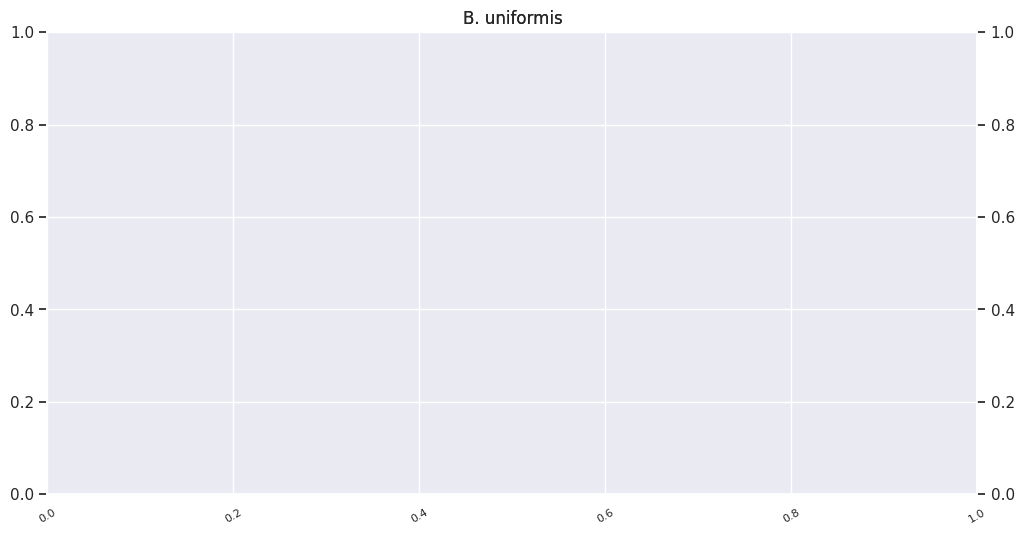

<Figure size 1200x600 with 0 Axes>

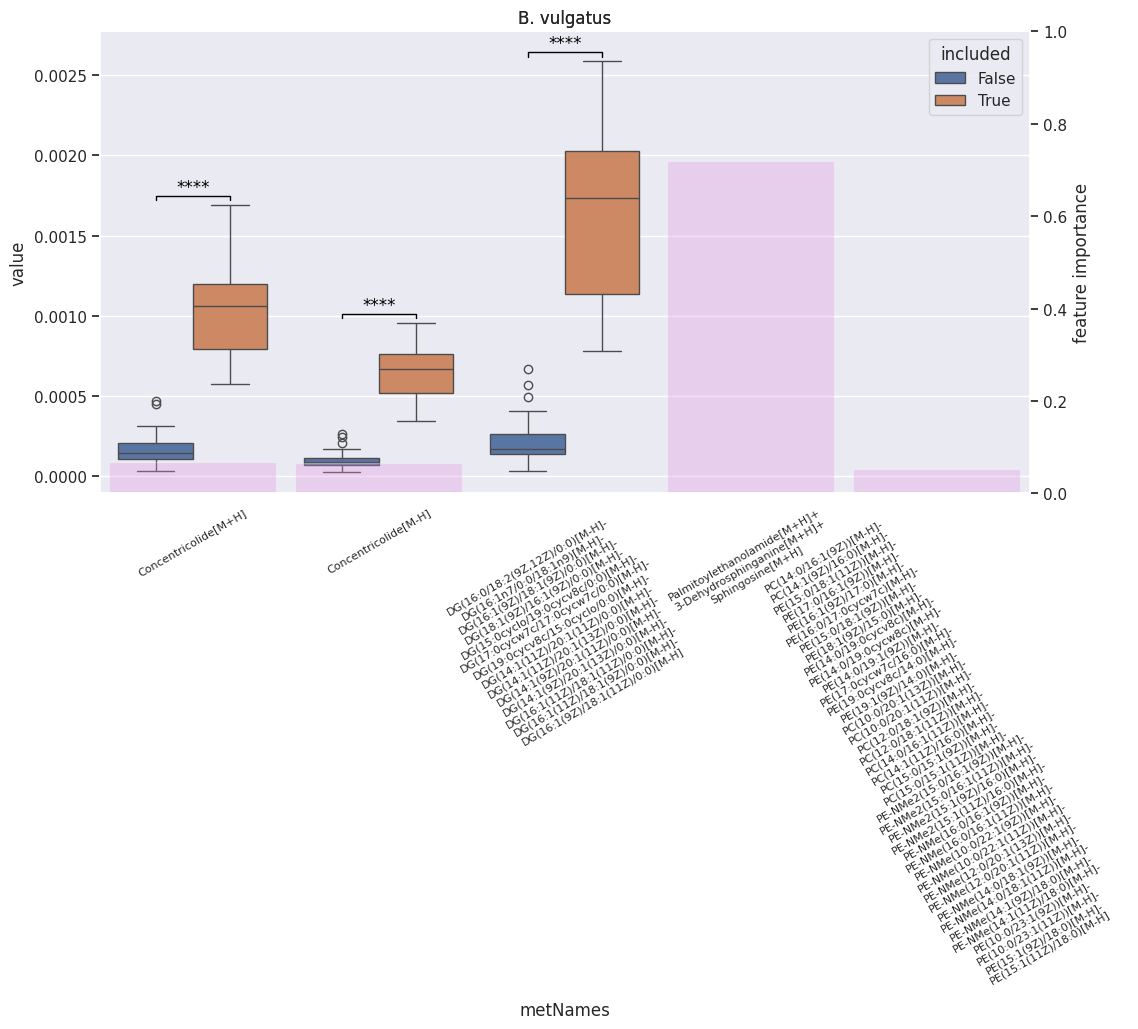

<Figure size 1200x600 with 0 Axes>

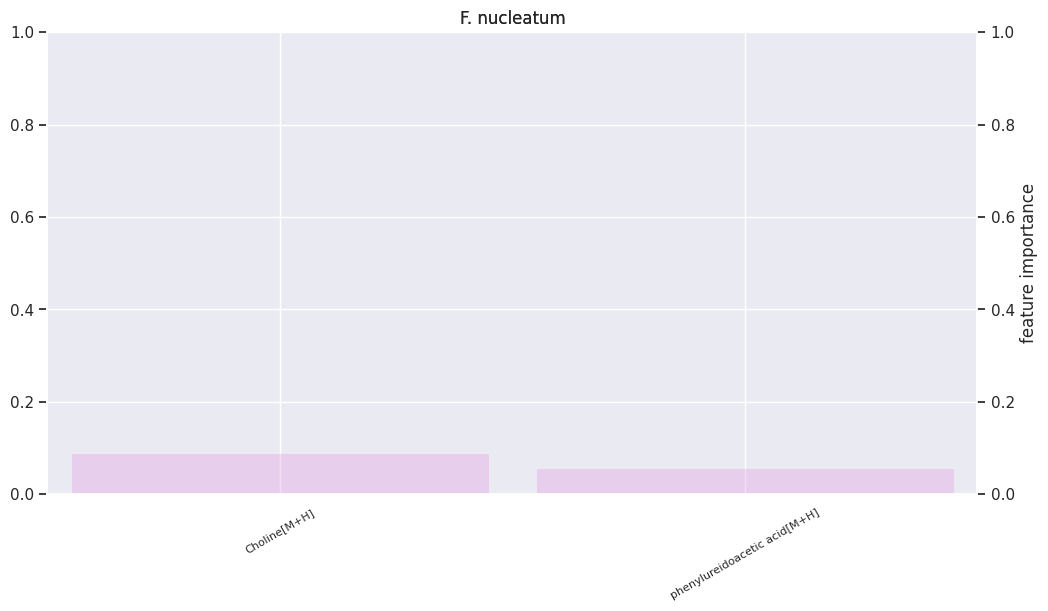

<Figure size 1200x600 with 0 Axes>

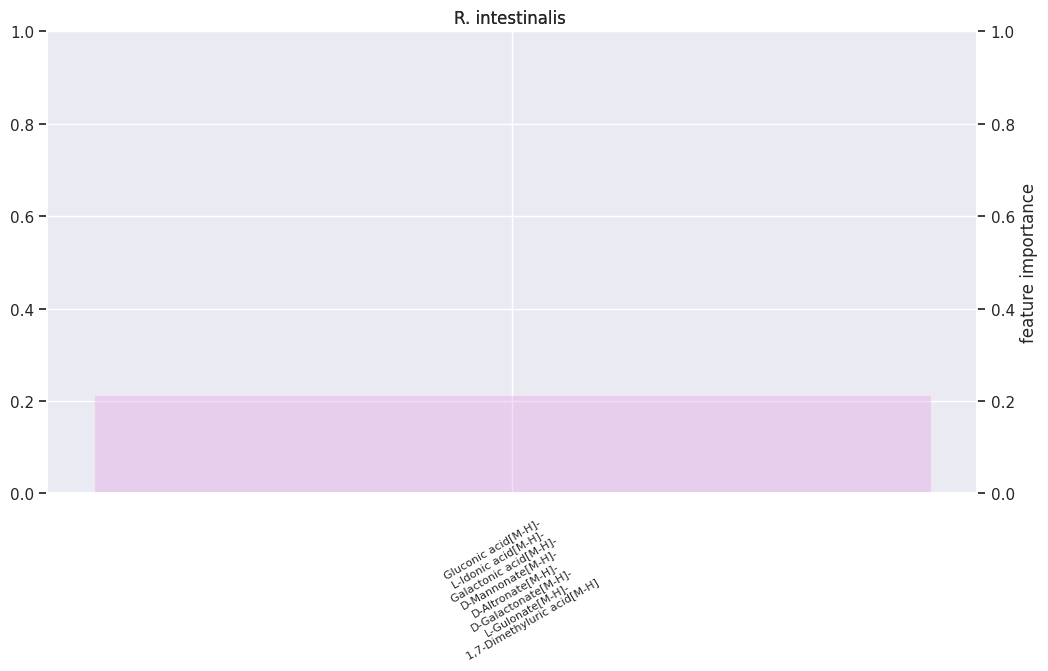

<Figure size 1200x600 with 0 Axes>

In [10]:
plots, axs = significance_importance_plot_batch(metabs_of_interest, importances_df, includes, p_vals, importance_cutoff=0.05, x_label_rot=30)

### Other way around

100%|██████████| 8/8 [00:14<00:00,  1.78s/it]


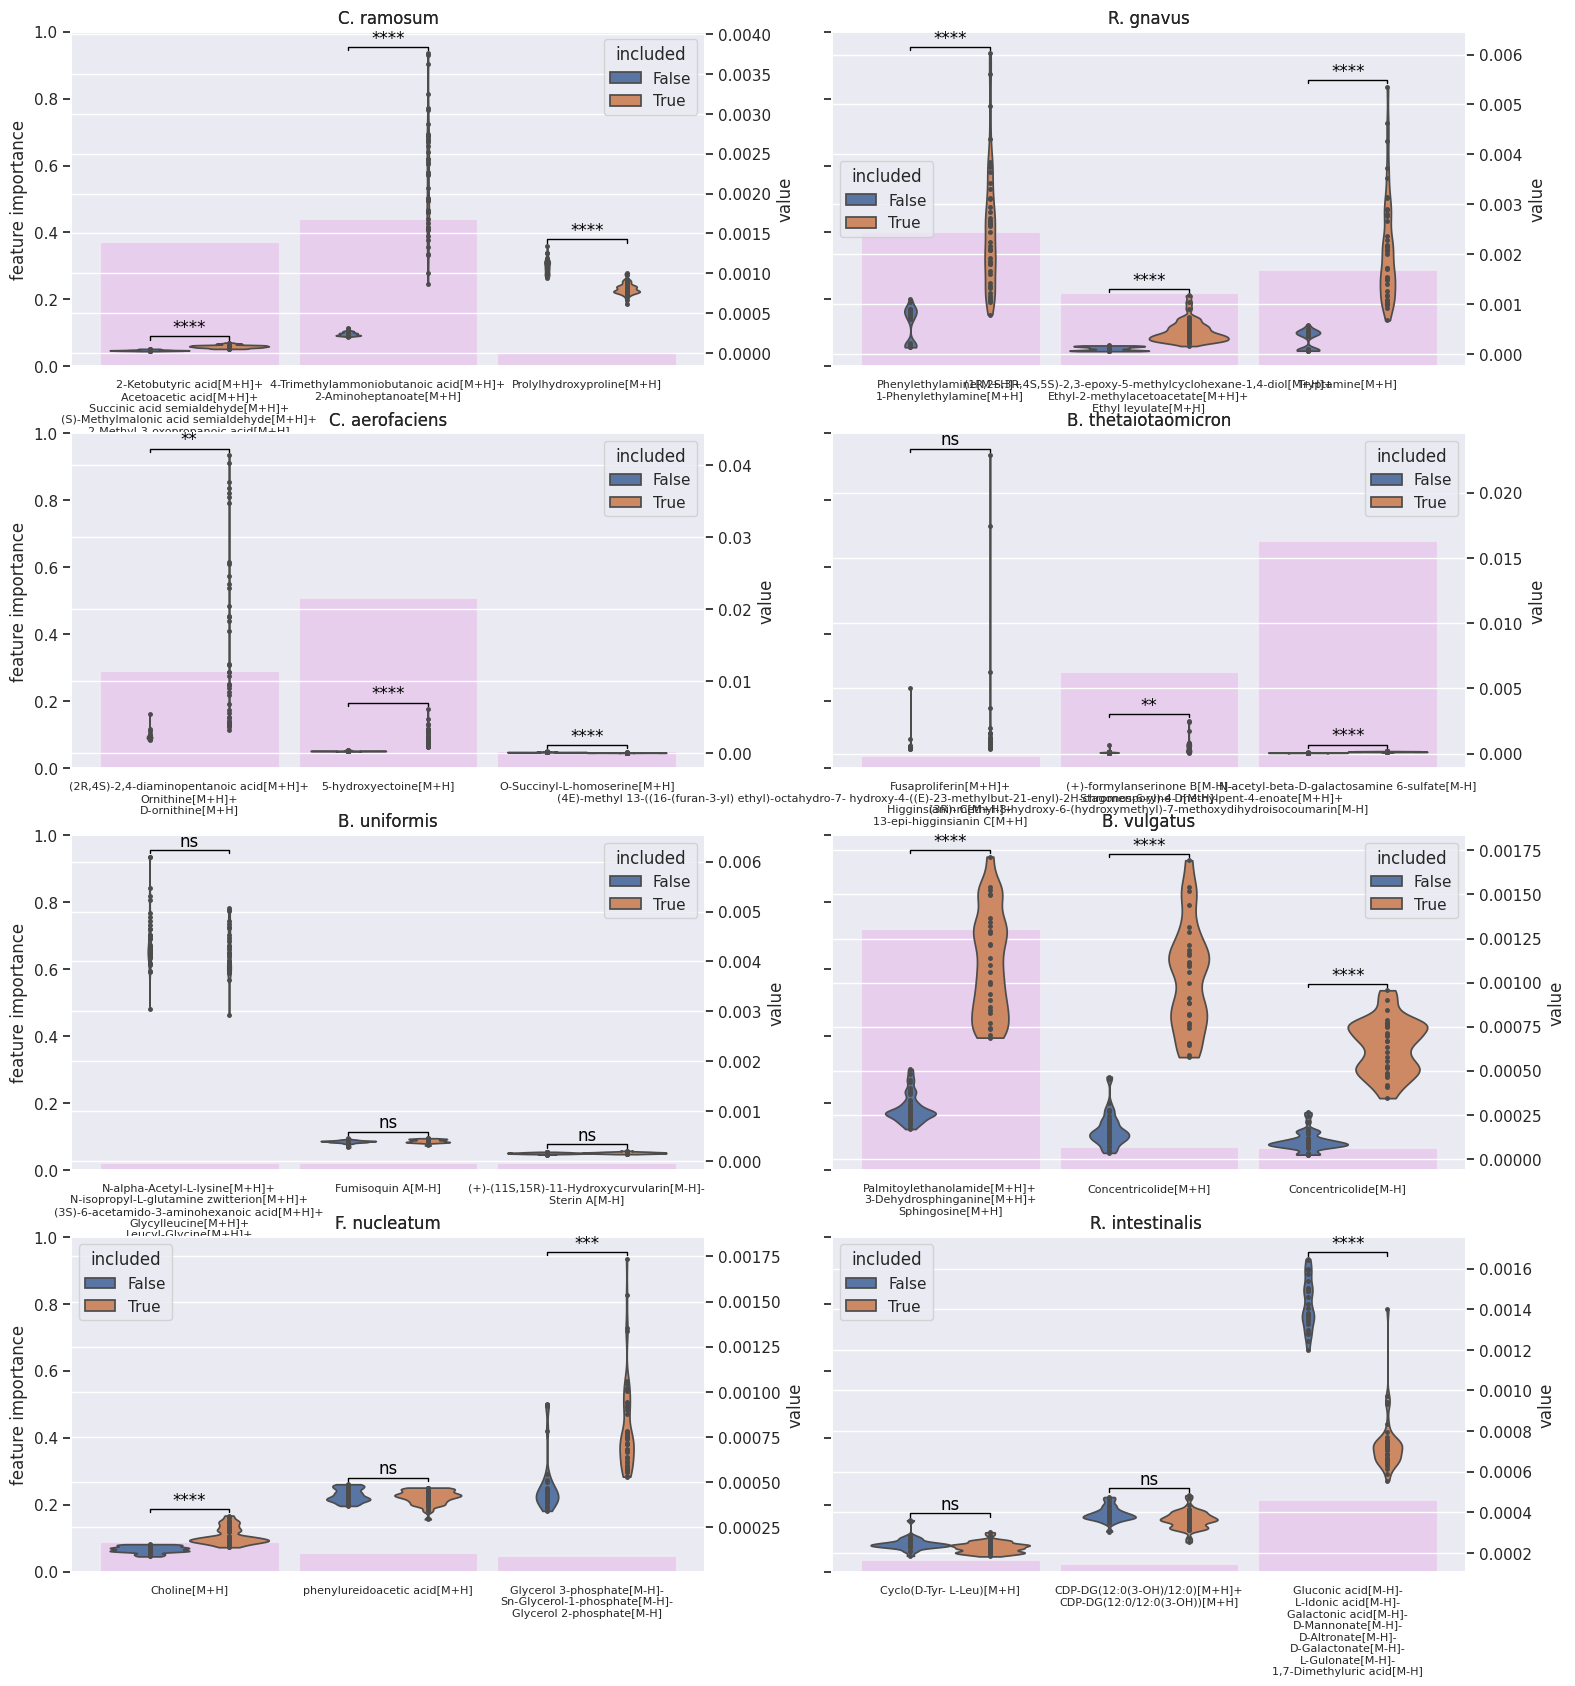

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [18]:
fig, axes = plt.subplots(4, 2,  figsize=(18,20), sharey=True)
plots, axs = importance_significance_plot_batch(test_stats, importances_df, includes, importance_cutoff=3, x_label_rot=0, x_labelsize=8, plottype="violin", axes=axes)
for ax in fig.get_axes():
    #ax.set_xticks([])
    ax.set_xlabel("")
plt.show()

## Combination COM8

In [12]:
com_2, org_2 = combine_organisms(comm8, strains)

In [13]:
results_2 = test_metabolites_organism(data=X, community_composition=com_2, organism_idx=0, alpha=1e-21, test=f_oneway)

In [14]:
figures_2, test_stats_2, includes_2 = plot_volcanos(X, org_2, com_2, sig_p=0.05, sig_fc_pos=4, sig_fc_neg=0.25,
                                                    color_map={}, show_labels=False, outfolder="../../reports/FIA/metabalysis")

In [20]:
figures_2.get(list(figures_2.keys())[1])

#### Interesting metabolites

In [16]:
metabs_of_interest_2, p_vals_2 = extract_metabolites_of_interest(test_stats_2)

 57%|█████▋    | 16/28 [00:00<00:00, 46.70it/s]/mnt/c/Users/JosuaCarl/Desktop/Thesis/MStoML/skripts/FIA/significance_analysis.py:150: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.

100%|██████████| 28/28 [00:00<00:00, 51.35it/s]


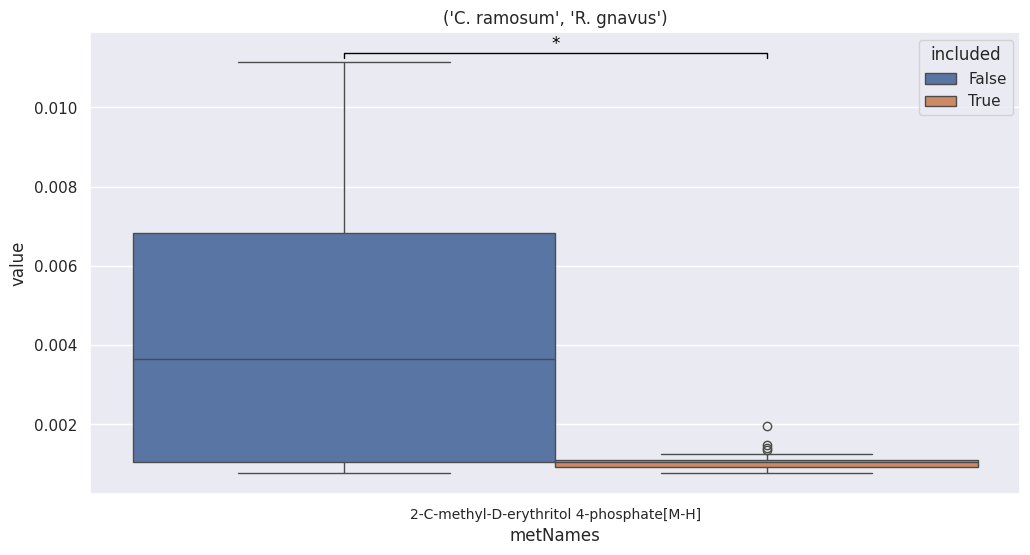

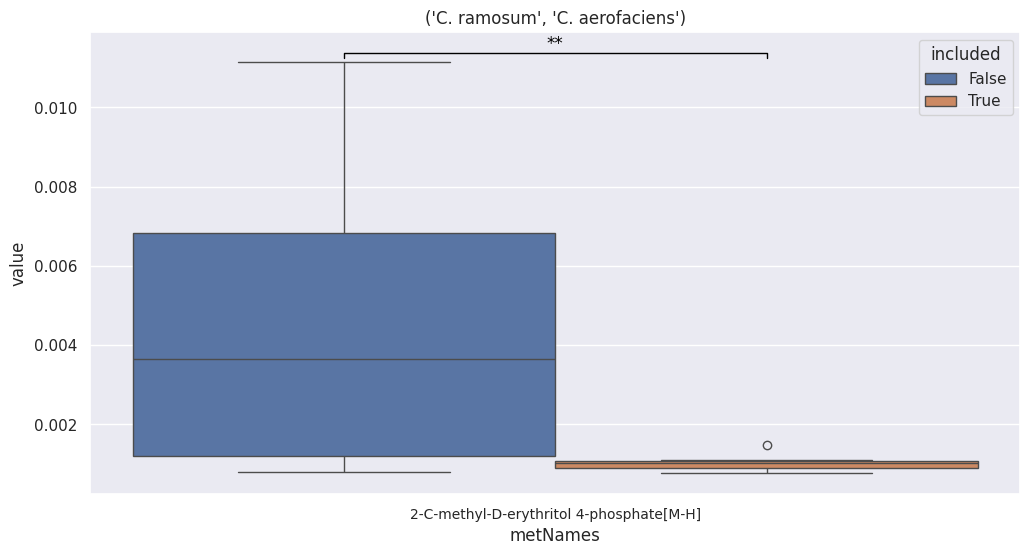

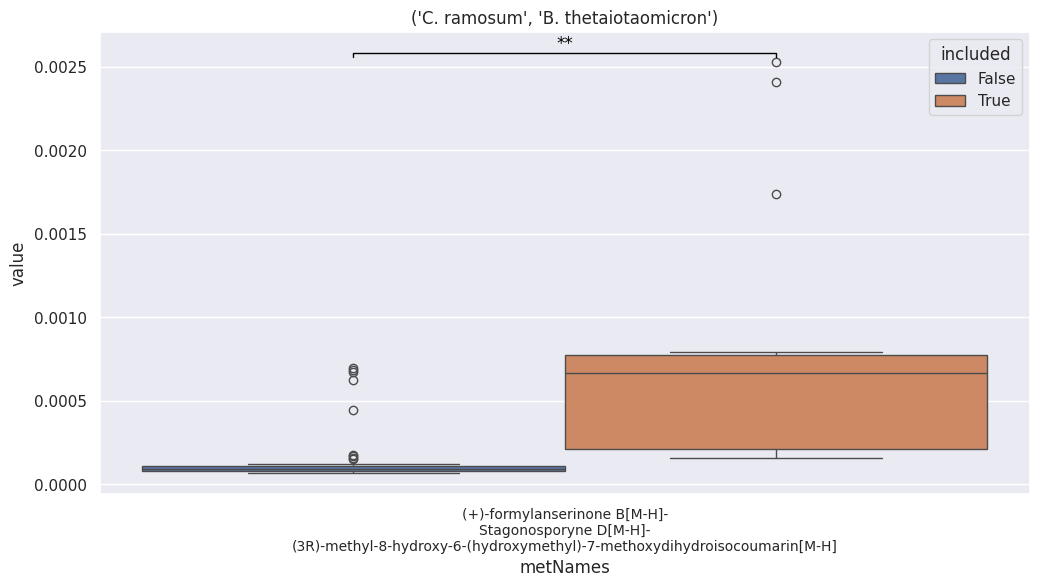

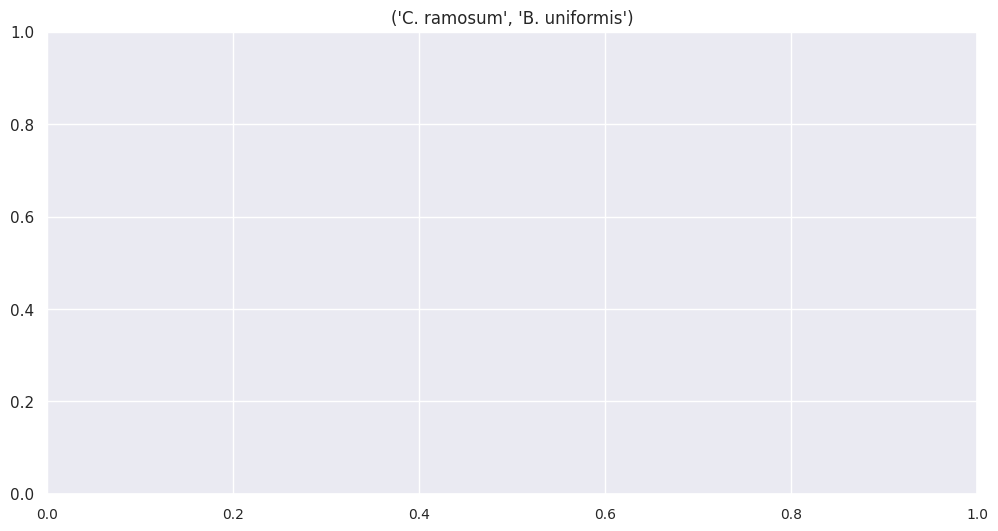

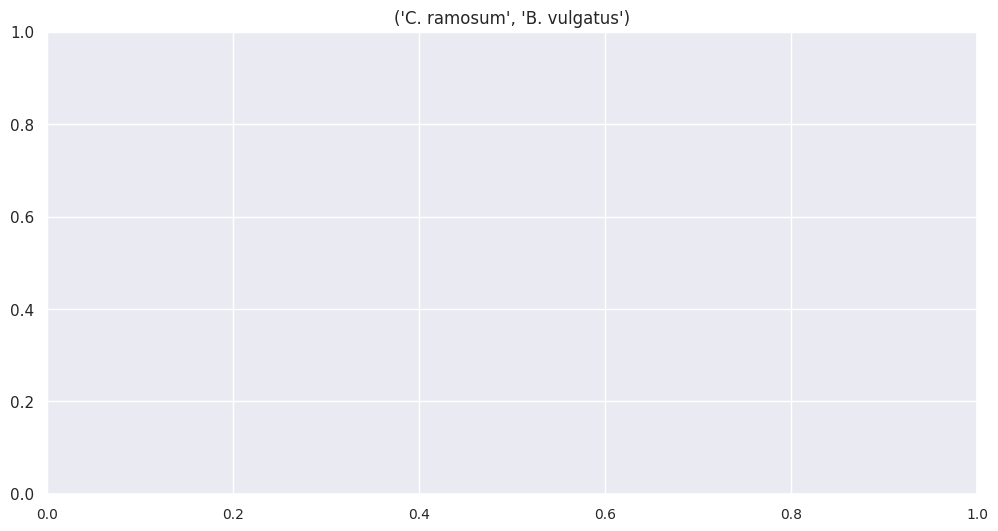

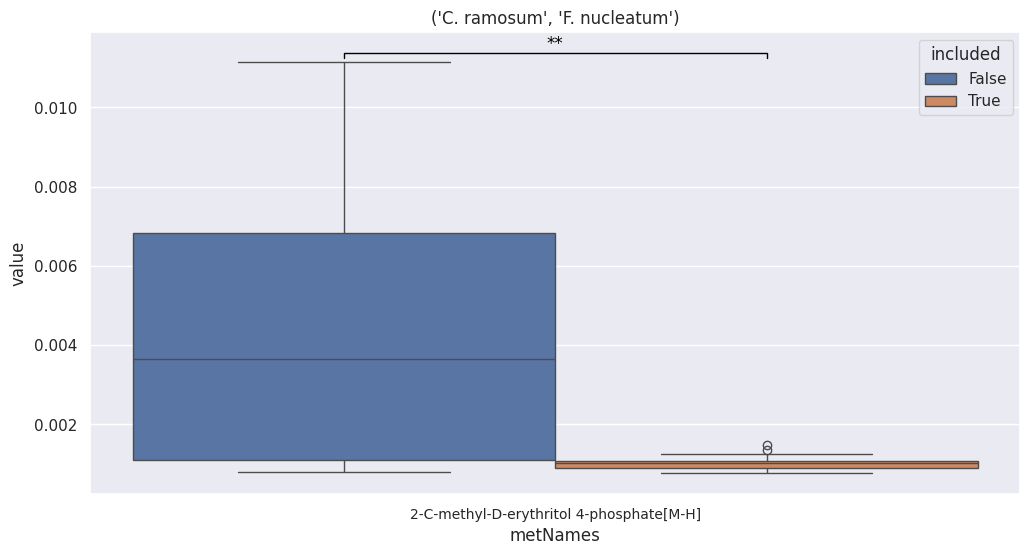

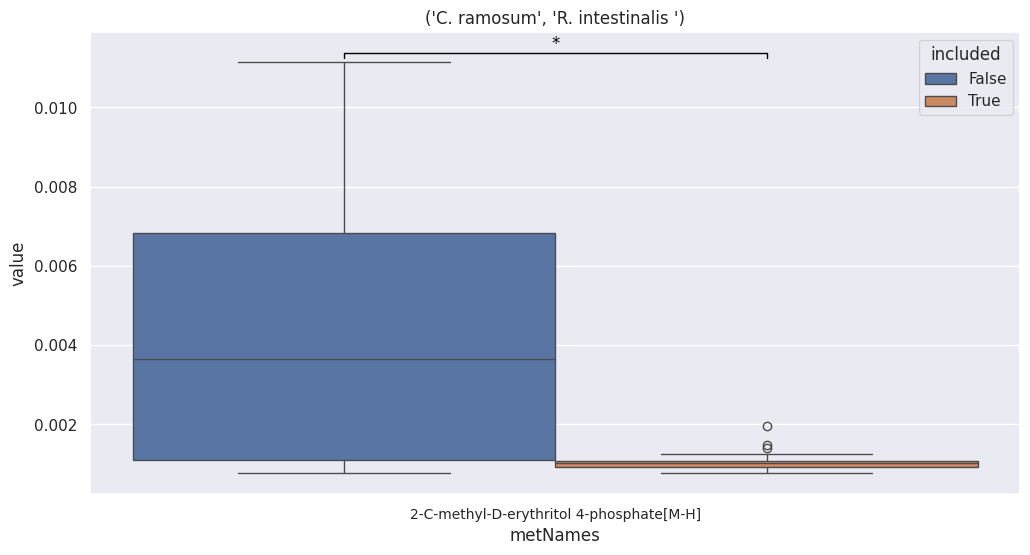

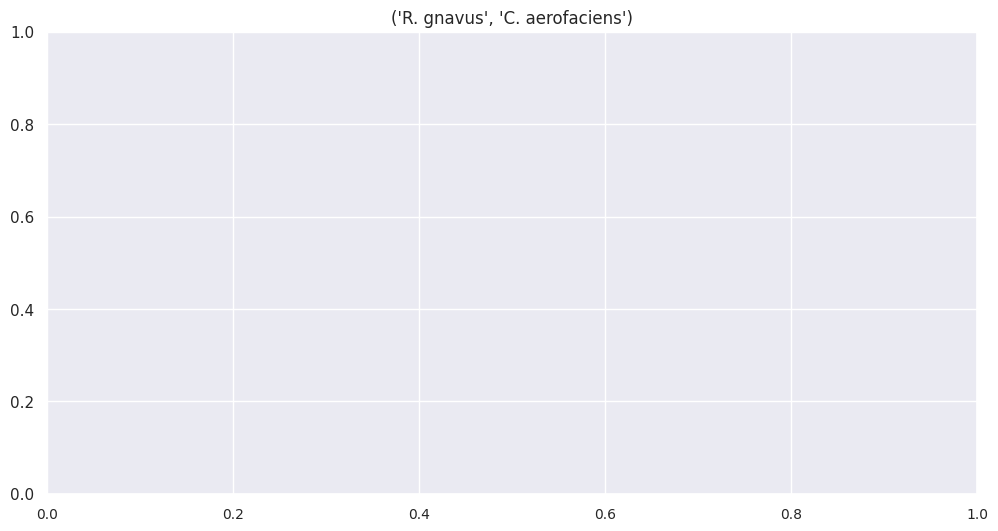

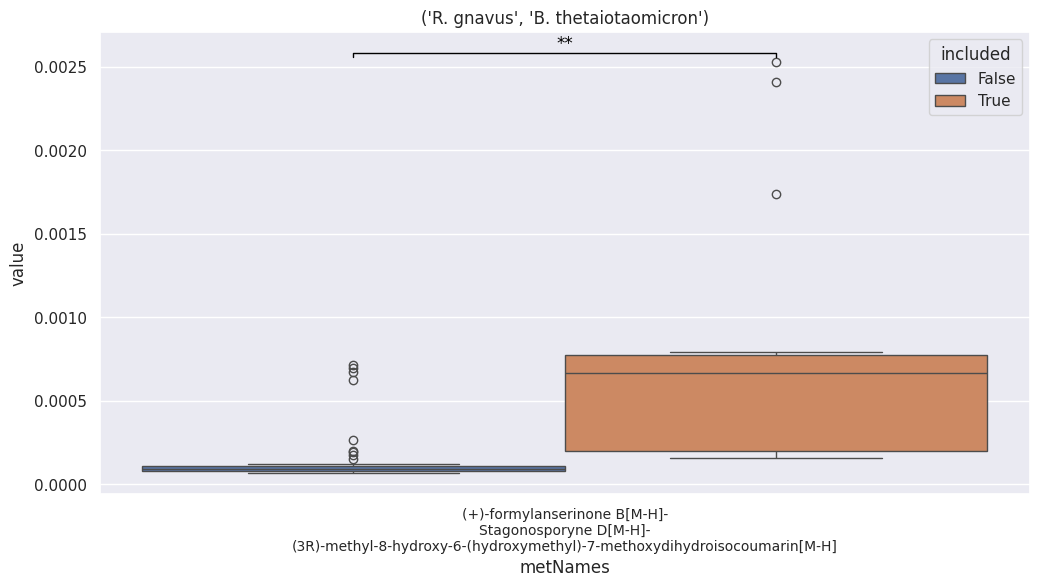

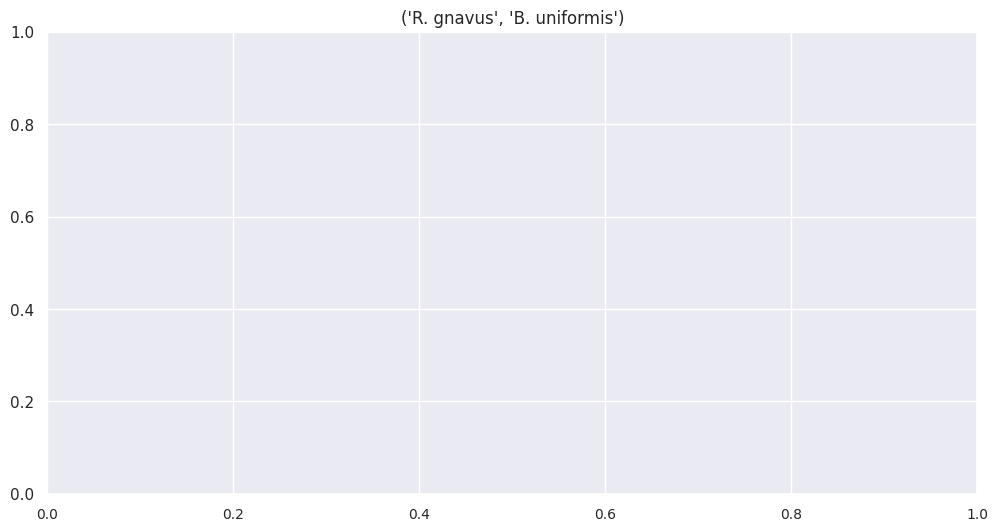

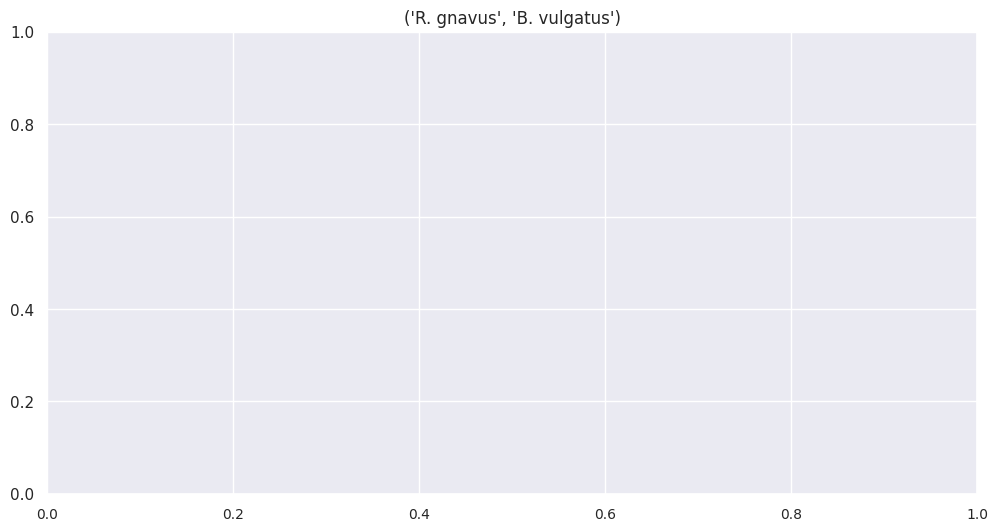

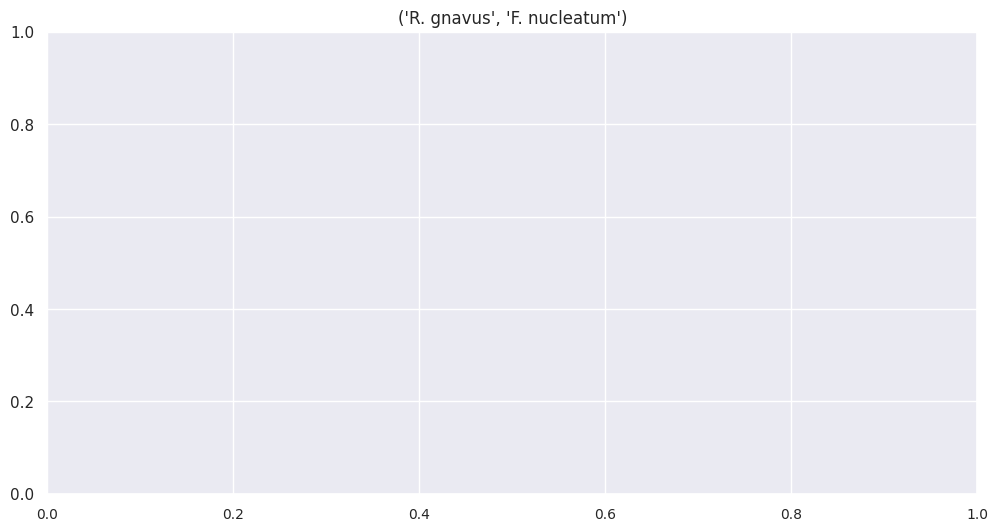

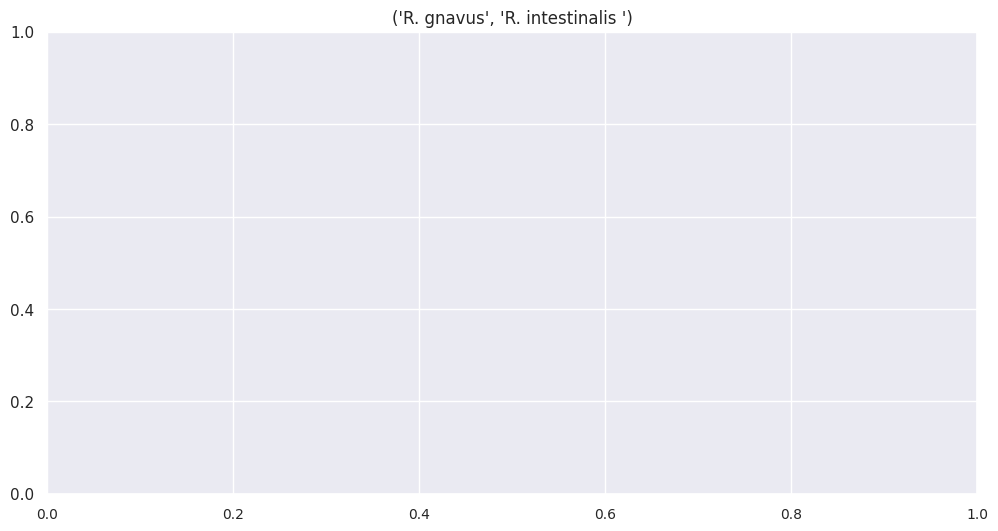

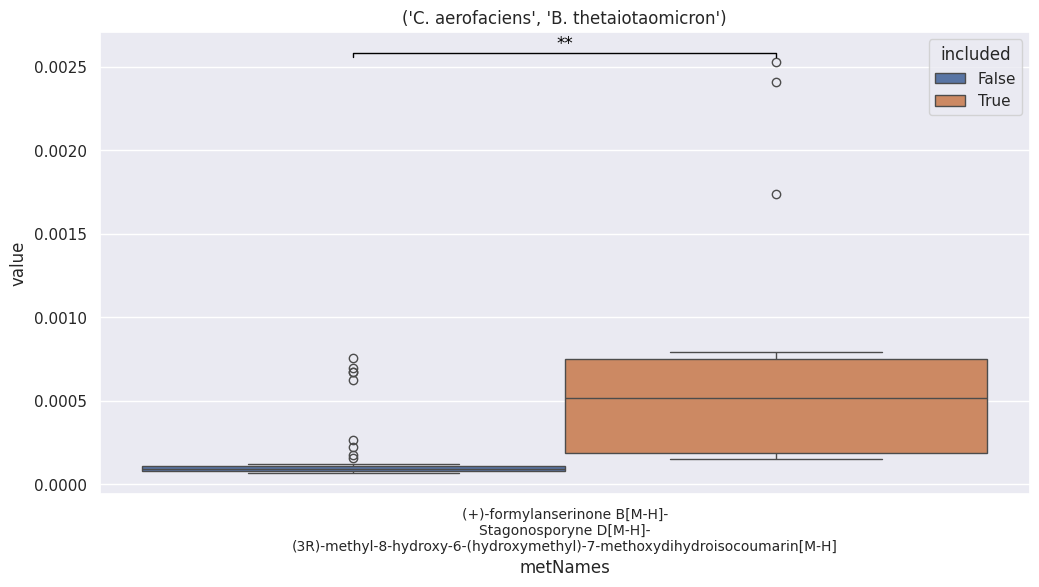

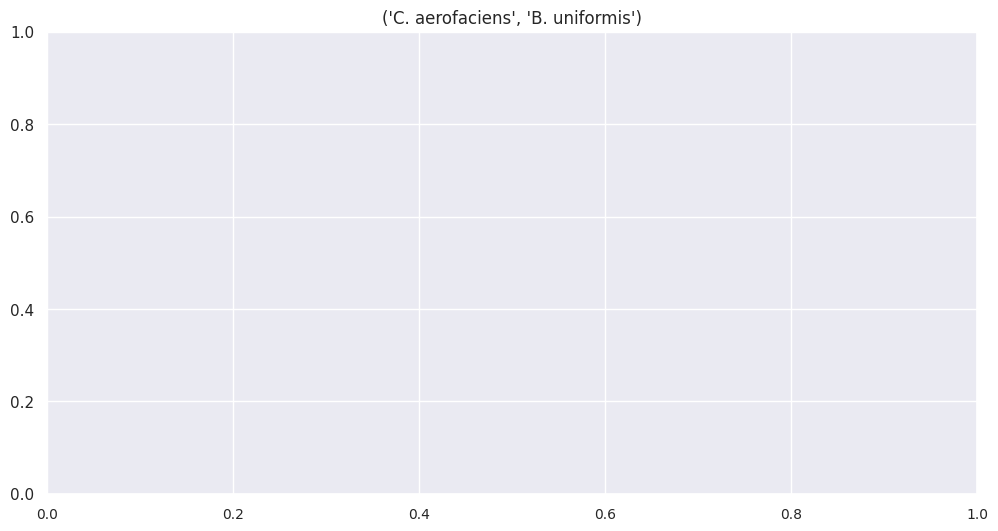

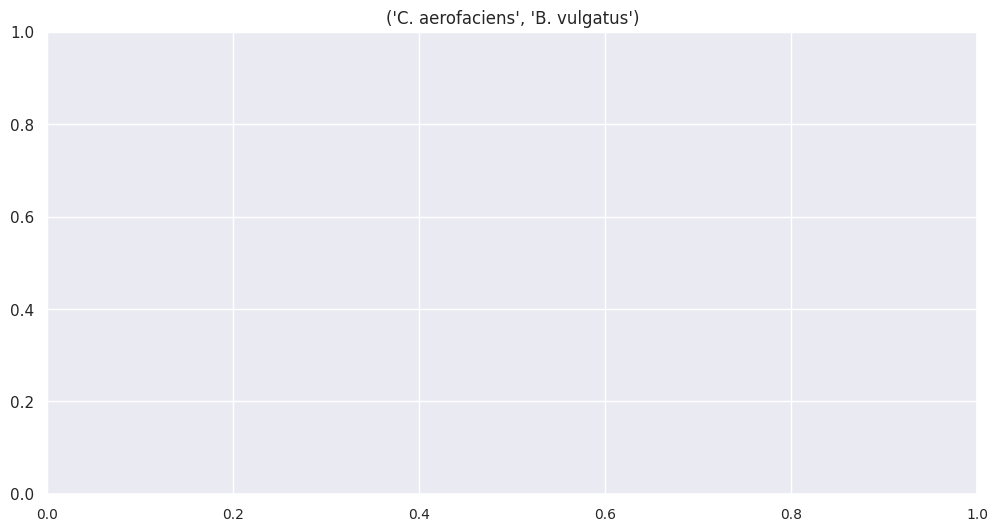

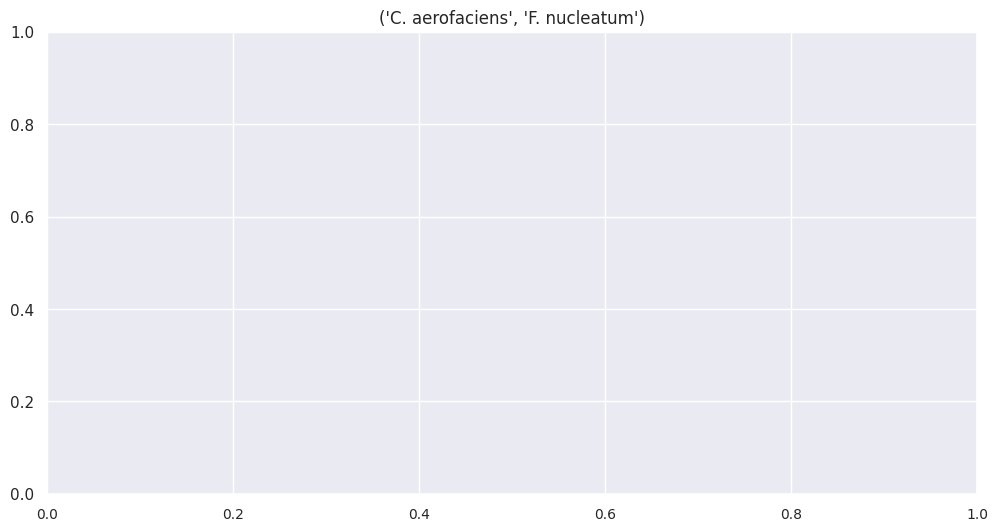

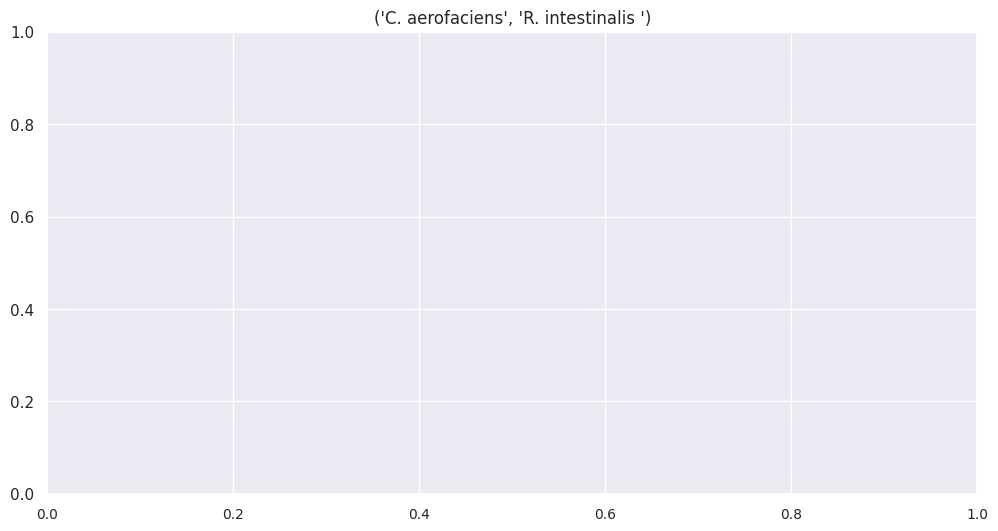

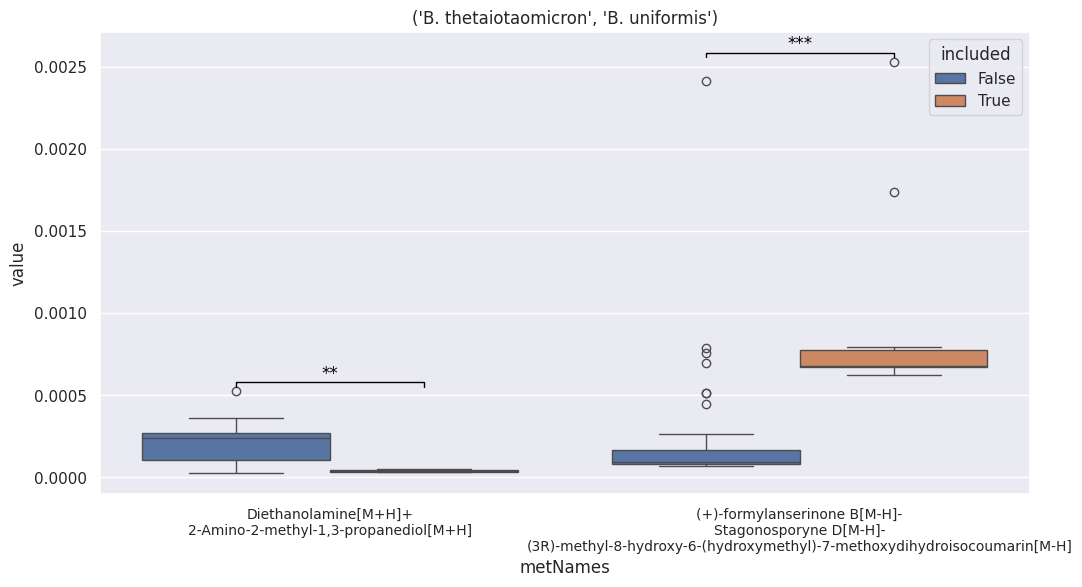

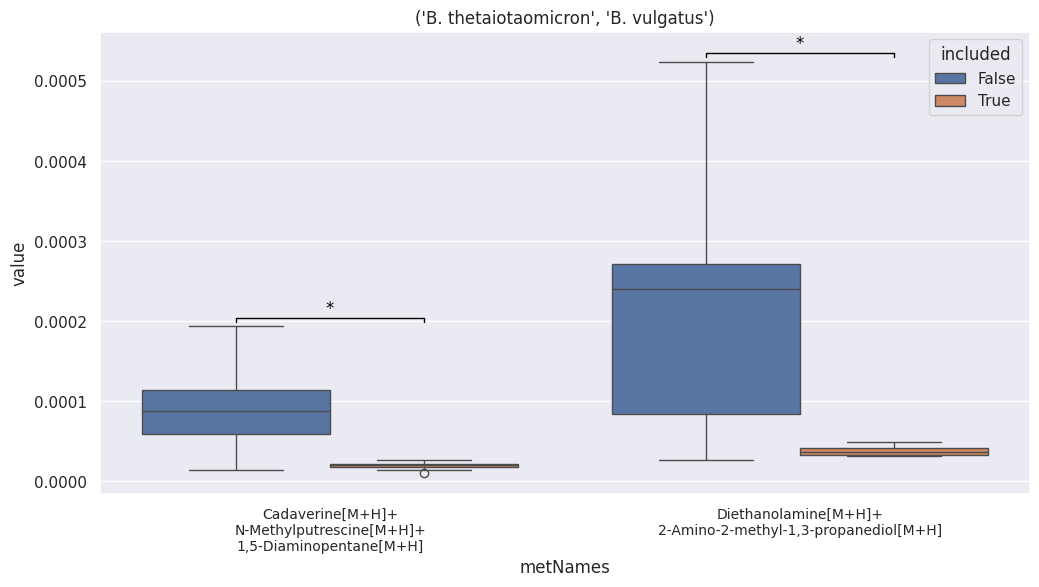

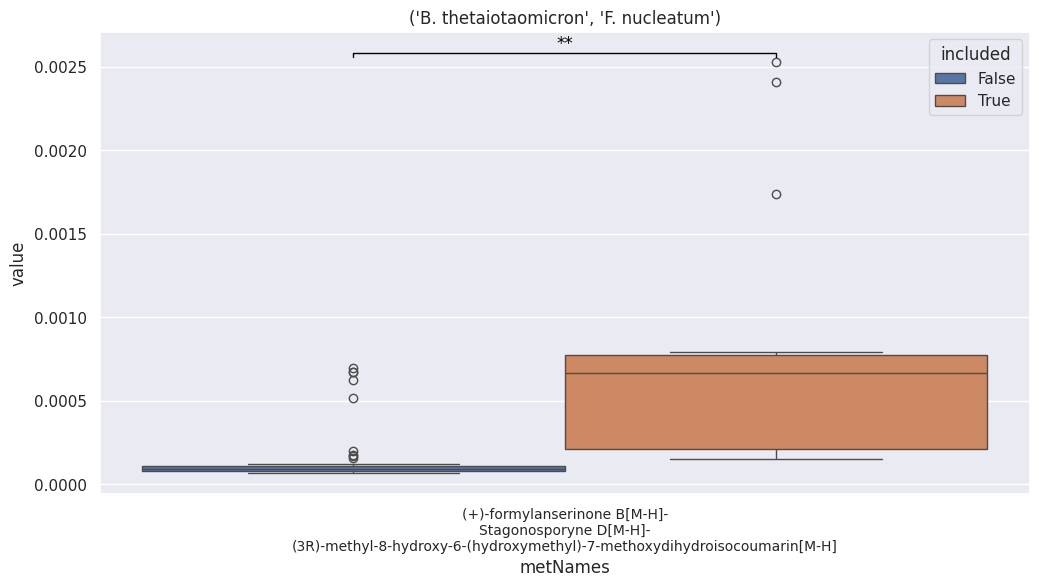

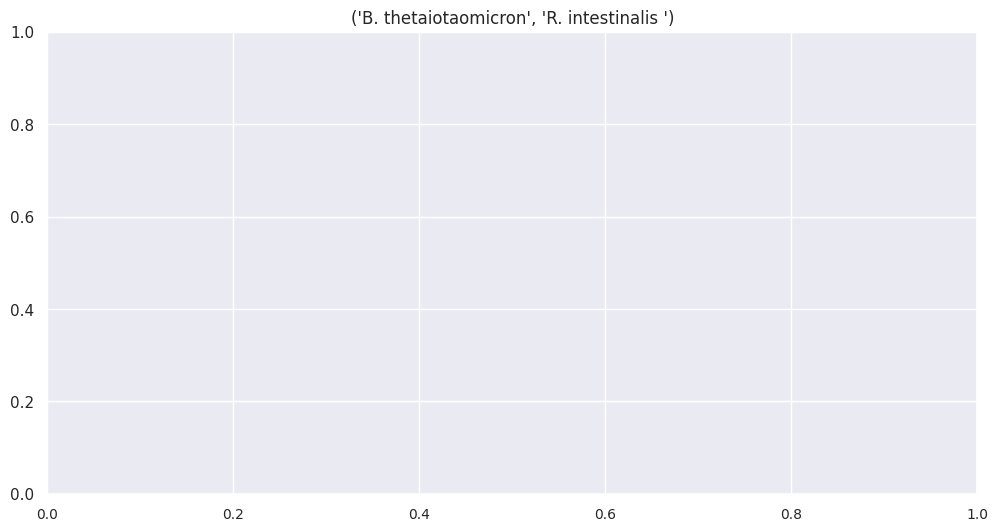

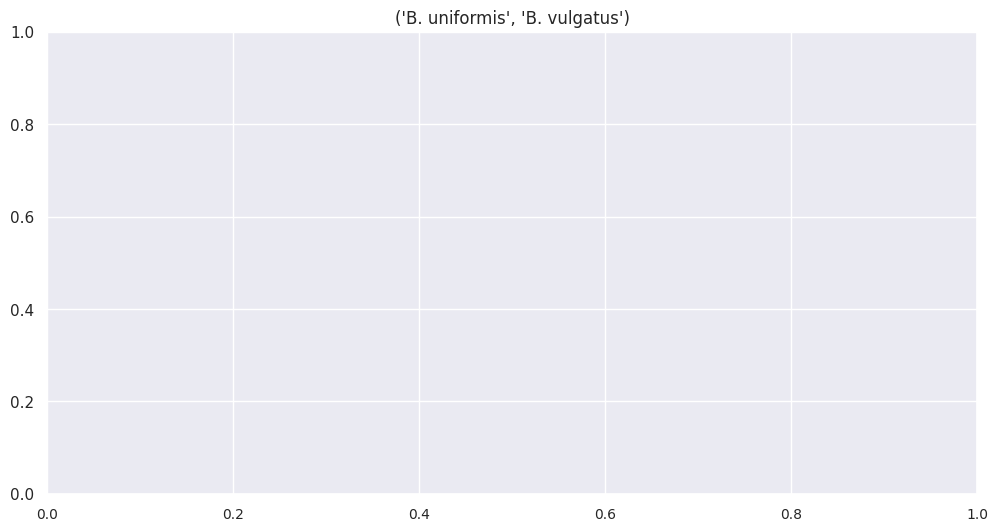

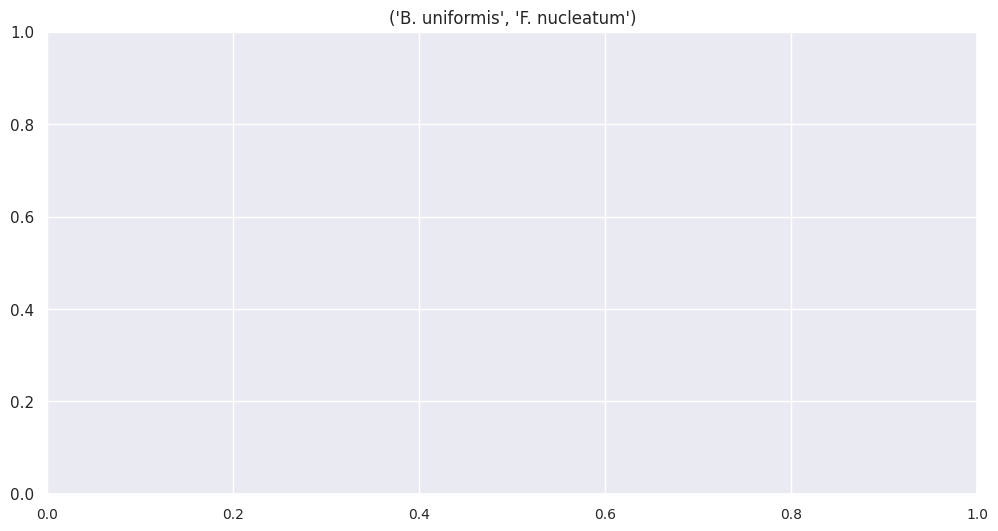

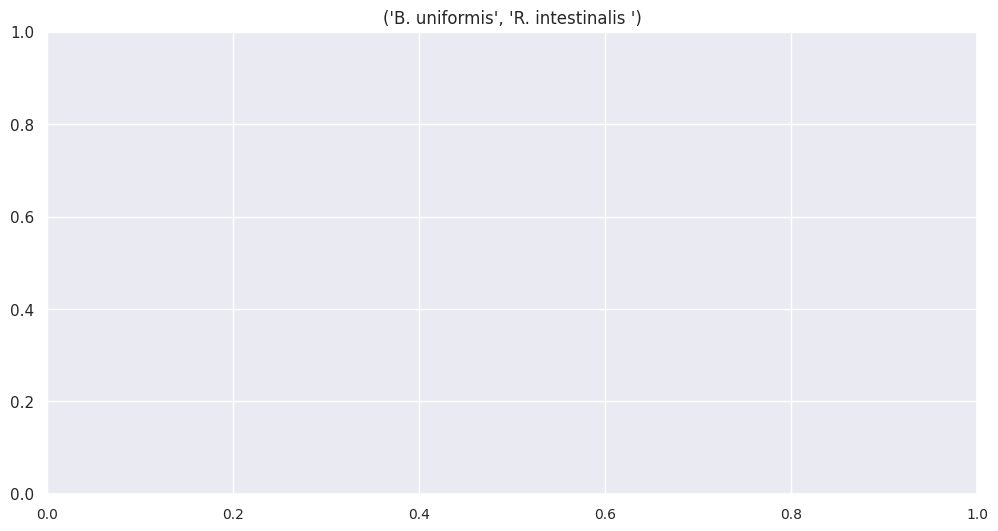

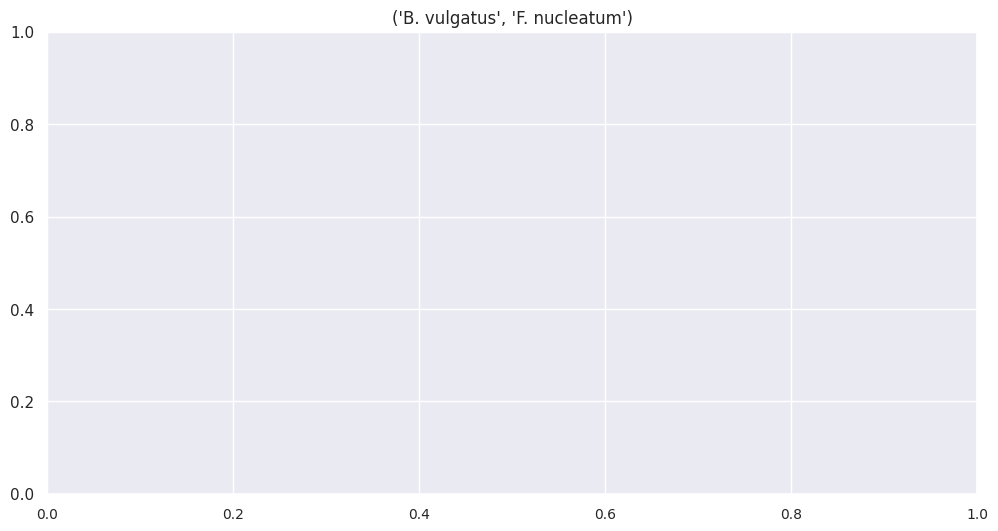

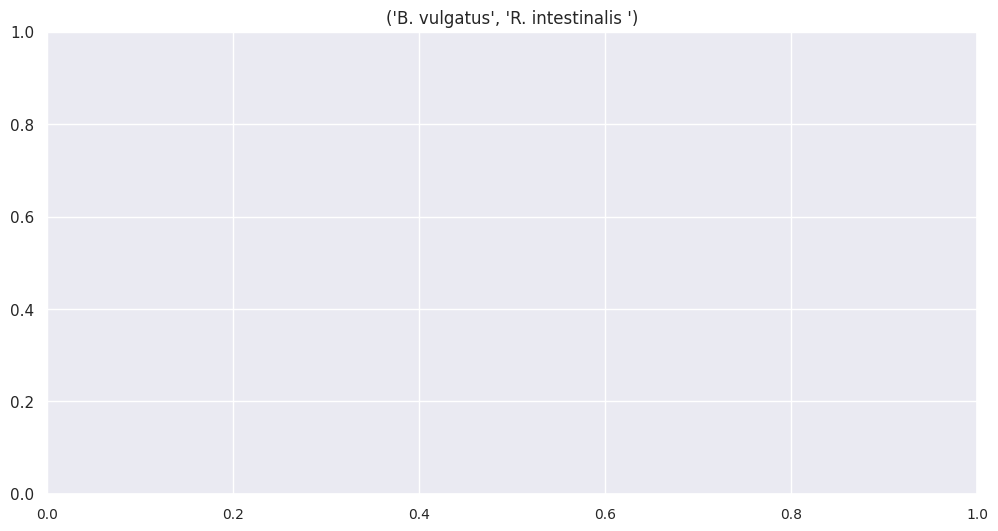

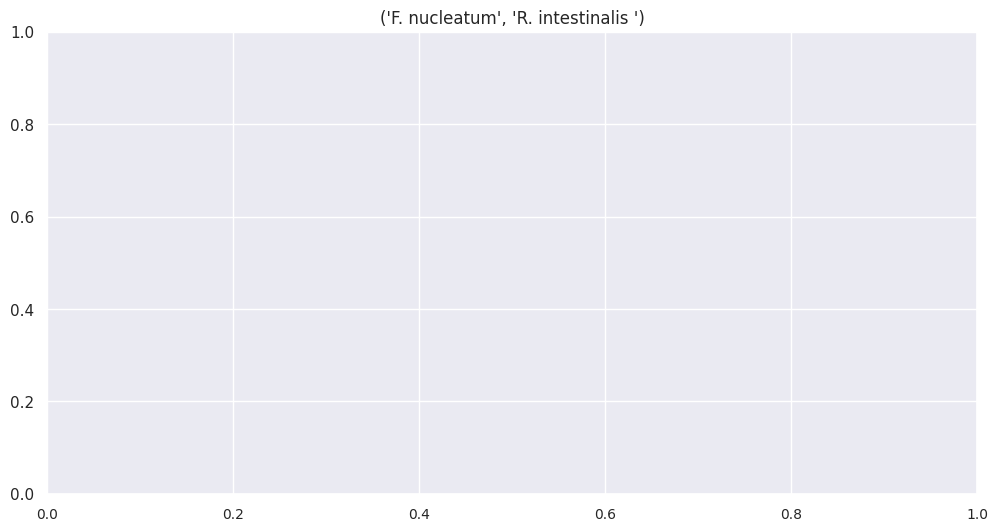

In [17]:
plots_2, axs_2 = significance_plot_batch(metabs_of_interest_2, includes_2, p_vals_2, x_label_rot=0)